## Predicting House Prices using Deep Neural Networks

### Problem Statement
We are going to be using deep neural networks to predict the house prices in boston, based on 14 features. A list of the features and their meanings are provided below.

In [41]:
"""
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


"""

"\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n prices and the demand for clean air', J. Environ. Economics & Management,\n vol.5, 81-102, 1978\n\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of b

### 1. Import necessary libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
# load data and arrange into Pandas dataframe
import pandas as pd
df = pd.read_csv(r"D:\Advanced_Machine_Learning\datasets\BostonHousingData.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


First step is always to check for missingness

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Looks like there is some missing values in some columns...for me I will drop them (but you should explore why and address the missingness)

In [4]:
df.dropna(inplace=True)

### 2. Exploring your data

In [6]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


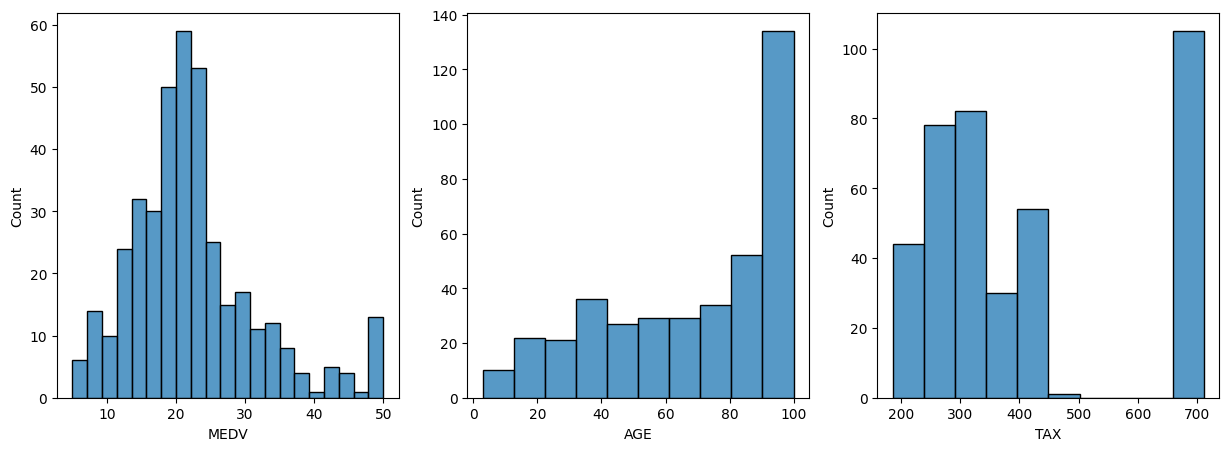

In [46]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(df['MEDV'], ax=ax[0])
sns.histplot(df['AGE'], ax=ax[1])
sns.histplot(df['TAX'], ax=ax[2])

plt.show()

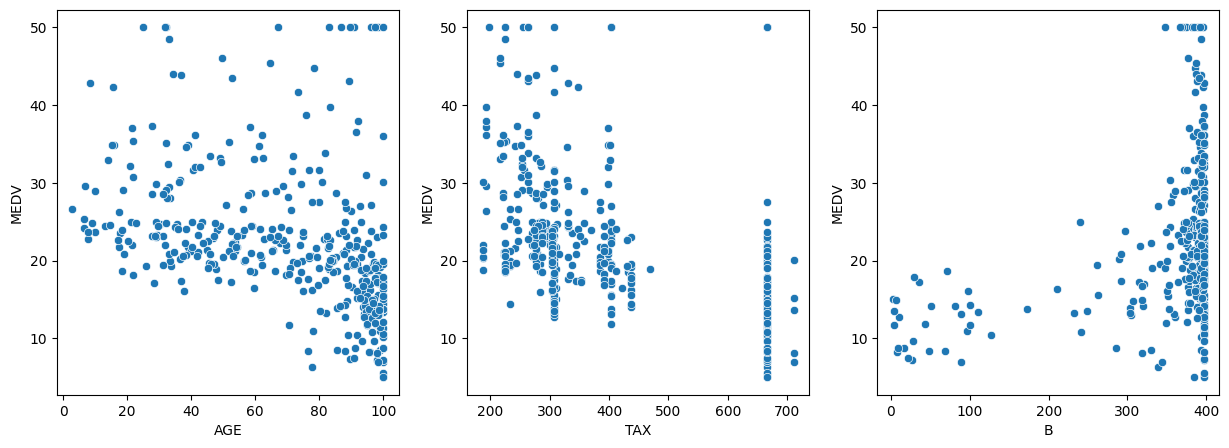

In [47]:
#Understand the data further. 
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.scatterplot(x=df['AGE'], y=df['MEDV'], ax=ax[0])
sns.scatterplot(x=df['TAX'], y=df['MEDV'], ax=ax[1])
sns.scatterplot(x=df['B'], y=df['MEDV'], ax=ax[2])


plt.show()

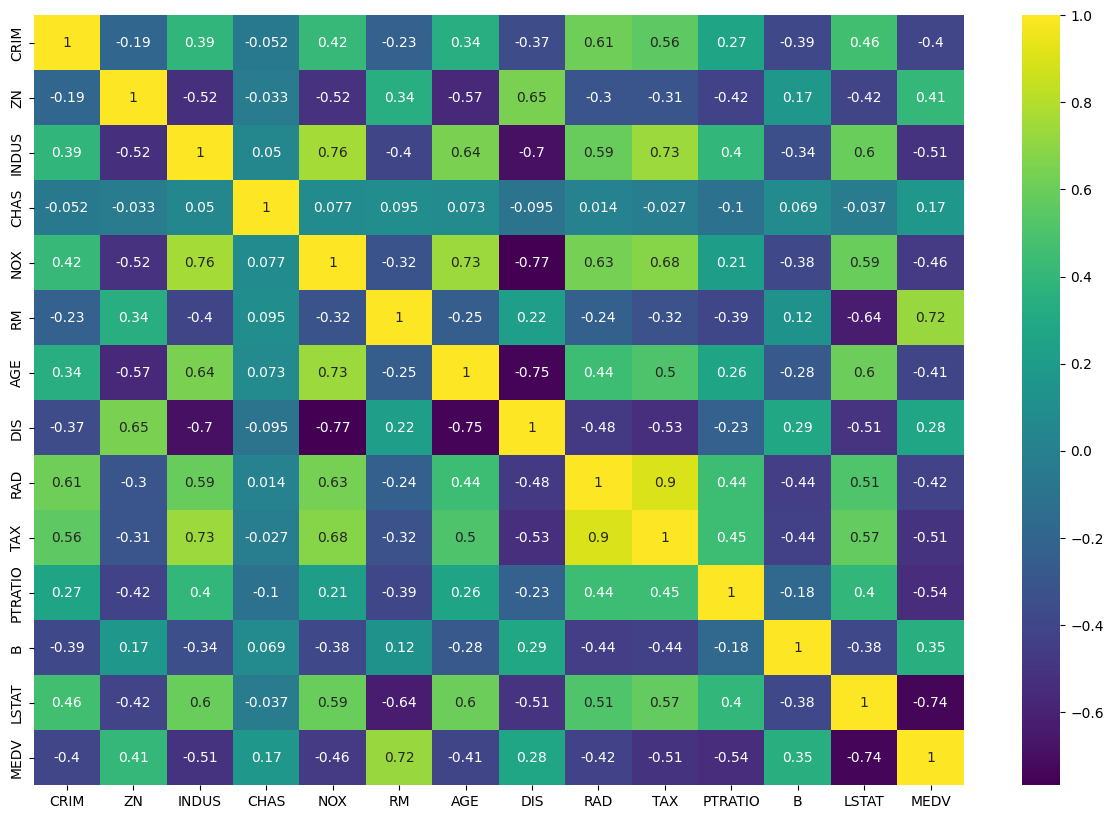

In [48]:
#correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

### 3. Modelling

#### 3.1 Train Test Split

In [49]:
#Split into features and target (Price)
X = df.drop('MEDV', axis = 1)
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(315, 13) (79, 13) (315, 1) (79, 1)


Scale the data as always, now I used StandardScaler, but you should probe the data further in the EDA, to see maybe if Robust Scaling would be more ideal.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 3.2 Model Building


In [51]:
# define the model
#Experiment with deeper and wider networks!!!

model = Sequential()

#define the input layer
model.add(Input(shape=(13,)))

#define the hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


#define the output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

#### 3.3 Model Training

In [52]:
history = model.fit(X_train_scaled, y_train, epochs =100, validation_data=(X_test_scaled, y_test))


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 574.0952 - mae: 22.2326 - val_loss: 543.9145 - val_mae: 21.3867
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 520.6686 - mae: 21.0241 - val_loss: 480.7355 - val_mae: 19.9937
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 445.6440 - mae: 19.2587 - val_loss: 383.5732 - val_mae: 17.6209
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 328.8364 - mae: 16.1191 - val_loss: 235.7849 - val_mae: 13.2961
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 173.4657 - mae: 10.9213 - val_loss: 90.3587 - val_mae: 7.5253
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 71.1336 - mae: 6.4960 - val_loss: 53.1515 - val_mae: 6.0366
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.9619 - mae: 5.6503 - val_loss: 33.5888 - val_mae: 4.7523
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34.7094 - mae: 4.3413 - val_loss: 22.4652 - val_mae: 3.7945
Epoch 9/100
10/10 ━━━━

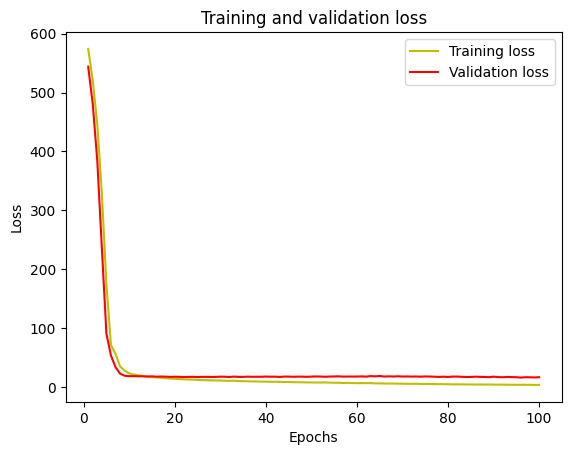

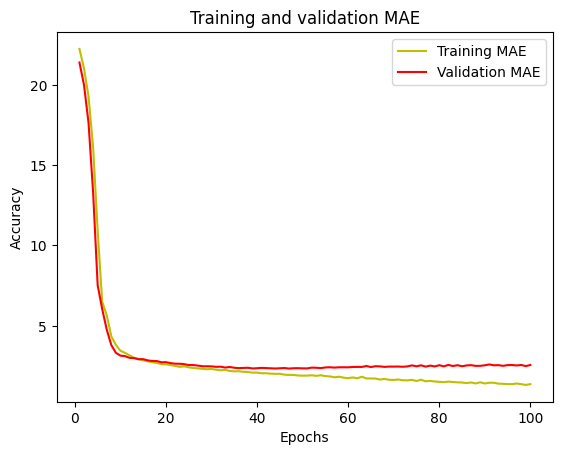

In [53]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
#Evaluate the performance of the current neural network
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.4003 - mae: 2.5600
Mean squared error from neural net:  16.400279998779297
Mean absolute error from neural net:  2.5599799156188965


### 4. Make predictions from unseen data

In [55]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted values are:  [[18.57607 ]
 [12.750159]
 [14.066838]
 [15.077395]
 [16.24057 ]]
Real values are:       MEDV
13   20.4
455  14.1
141  14.4
491  13.6
21   19.6
